# Unsupervised learning- clustering
Fashion-MNIST is a dataset of Zalando's article images—consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes. Zalando intends Fashion-MNIST to serve as a direct drop-in replacement for the original MNIST dataset for benchmarking machine learning algorithms. The original MNIST dataset contains a lot of handwritten digits. Members of the AI/ML/Data Science community love this dataset and use it as a benchmark to validate their algorithms. 

Each image is 28 pixels in height and 28 pixels in width, for a total of 784 pixels in total. Each pixel has a single pixel-value associated with it, indicating the lightness or darkness of that pixel, with higher numbers meaning darker. This pixel-value is an integer between 0 and 255. The training and test data sets have 785 columns. The first column consists of the class labels (see above), and represents the article of clothing. The rest of the columns contain the pixel-values of the associated image.

Each training and test example is assigned to one of the following labels:

    0 T-shirt/top
    1 Trouser
    2 Pullover
    3 Dress
    4 Coat
    5 Sandal
    6 Shirt
    7 Sneaker
    8 Bag
    9 Ankle boot
    
We will only use the training set and drop the labels, as we want to do unsupervised learning. We will also only use the first 6000 pictures (in stead of the full 60 000), just lower the computation time.  We will try to cluster the different pictures in 10 categories.     

# 0. loading packages and dataset

In [19]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('fashion-mnist_train.csv')

# 1. Take a look at the data (and prepare the data)
1. Look at the dimensions (number of features and observations)
2. Look at the first 5 rows
3. Select only the first 6000 rows from the dataset
4. Drop the labels from the dataset, but also save the labels in a seperate dataset called 'labels'.
5. Take a look at the number of pictures in each  category.
6. Check if the data is already normalized or not? Tip: use .describe(). If the data is normalized, the values should range between 0 and 1.
7. If necessary, normalize the data.
8. Take a look at the pictures for the different labels. (To have an idea what we are working with.)
    + The code is already provided, just adjust the number for the label to get pictures for a different label


1. Dimensions

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 785 entries, label to pixel784
dtypes: int64(785)
memory usage: 359.3 MB


2. First rows

In [21]:
df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


3. First 6000 rows

In [22]:
df = df.iloc[0:6000,:]

4. Drop (and save) labels

In [23]:
labels = df['label']
data = df.drop(['label'], axis=1)

5. Number of pictures per category

In [24]:
import collections
collections.Counter(sorted(labels))

Counter({0: 630,
         7: 619,
         6: 616,
         3: 613,
         1: 603,
         5: 592,
         2: 586,
         4: 586,
         9: 582,
         8: 573})

6. Check if data is normalized

In [25]:
data.iloc[:,0:10].describe()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10
count,6000.000000,6000.000000,6000.000000,6000.00000,6000.000000,6000.000000,6000.000000,6000.000000,6000.0000,6000.000000
mean,0.003500,0.006500,0.040333,0.14550,0.251000,0.467500,0.838167,2.216833,5.5100,13.957833
std,0.202059,0.186539,0.889478,3.12137,4.055335,6.367786,8.105816,13.942497,23.4013,37.400493
min,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000
25%,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000
50%,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000
75%,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000
max,14.000000,10.000000,56.000000,164.00000,162.000000,205.000000,198.000000,216.000000,216.0000,255.000000


The data is not normalized here, so we will need to do this ourself. With pictures, you normalize bij dividing by 255 (range of possible pixel-values)

7. Normalize

In [26]:
data_n = data/255

8. Take a look at the pictures for the different labels.

<Figure size 1000x1000 with 0 Axes>

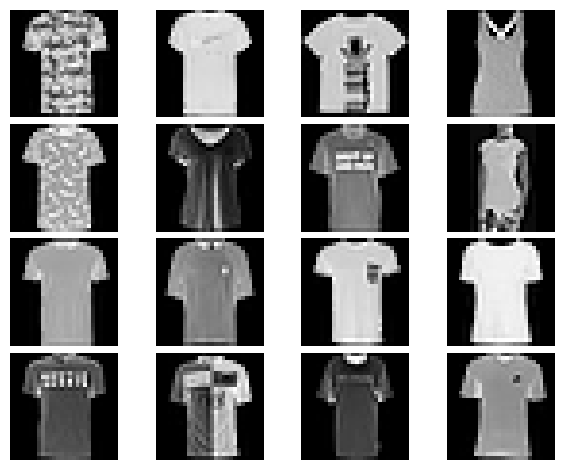

In [27]:
label = np.arange(0,data_n.shape[0])[df.label == 0]

plt.figure(figsize=(10, 10))  
fig, ax_array = plt.subplots(4,4)
axes = ax_array.flatten()
for i , ax in enumerate(axes): 
    im = np.array(data.iloc[label[i],:]).reshape(28,28)
    ax.imshow(im, cmap="gray")
plt.setp(axes, xticks=[], yticks=[], frame_on=False)
plt.tight_layout(h_pad=0.5, w_pad=0.01)

In [57]:
# 2. K-means clustering

In [29]:
data_n.iloc[:,1].describe()

count    6000.000000
mean        0.000025
std         0.000732
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         0.039216
Name: pixel2, dtype: float64

# 2. K-means clustering
We will now do clustering: in an unsupervised way find clusters of data which are more alike internally, and more dissimilar from other clusters. This means we do not use the labels. Our algorithm doesn't get to see the real labels.

1. Perform a k-means clustering. Decide the number of clusters yourself (Tip: it should be obvious from the context).
2. Predict the labels for each picture
3. Take a look at the number of pictures in each predicted category.
4. Take a look at the first 16 pictures for each predicted label.
    + Which kind of clothes are in each cluster?
    + Are all categories that we expected present? Which are missing or which do we have too many of?

1. Perform k-means clustering

In [30]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=10, random_state=130)
kmeans.fit(data_n)

KMeans(n_clusters=10, random_state=130)

2. Make a prediction 

In [31]:
pred = kmeans.predict(data_n)
pred

array([5, 7, 5, ..., 4, 0, 8], dtype=int32)

3. Take a look at the number of pictures in each  category.

In [32]:
import collections, numpy
collections.Counter(sorted(pred))

Counter({np.int32(5): 949,
         np.int32(0): 814,
         np.int32(8): 788,
         np.int32(1): 733,
         np.int32(4): 693,
         np.int32(7): 506,
         np.int32(2): 503,
         np.int32(3): 411,
         np.int32(6): 333,
         np.int32(9): 270})

4. Take a look at the first 16 pictures for each predicted label. 
    + cluster 0

<Figure size 1000x1000 with 0 Axes>

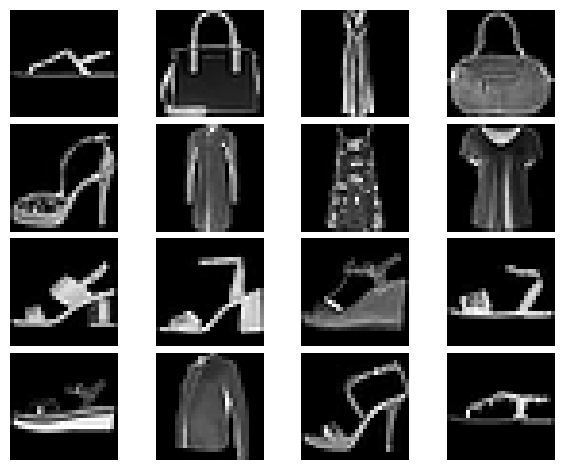

In [33]:
cluster = np.arange(0,data_n.shape[0])[pred == 0]

plt.figure(figsize=(10, 10))  
fig, ax_array = plt.subplots(4,4)
axes = ax_array.flatten()
for i , ax in enumerate(axes): 
    im = np.array(data.iloc[cluster[i],:]).reshape(28,28)
    ax.imshow(im, cmap="gray")
plt.setp(axes, xticks=[], yticks=[], frame_on=False)
plt.tight_layout(h_pad=0.5, w_pad=0.01)

This cluster shows the Sneakers

+ cluster 1

<Figure size 1000x1000 with 0 Axes>

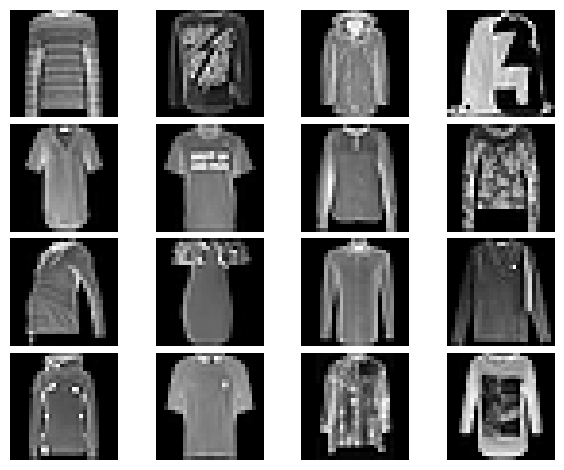

In [34]:
cluster = np.arange(0,data_n.shape[0])[pred ==1]

plt.figure(figsize=(10, 10))  
fig, ax_array = plt.subplots(4,4)
axes = ax_array.flatten()
for i , ax in enumerate(axes): 
    im = np.array(data.iloc[cluster[i],:]).reshape(28,28)
    ax.imshow(im, cmap="gray")
plt.setp(axes, xticks=[], yticks=[], frame_on=False)
plt.tight_layout(h_pad=0.5, w_pad=0.01)

Ankle boots

+ cluster 2

<Figure size 1000x1000 with 0 Axes>

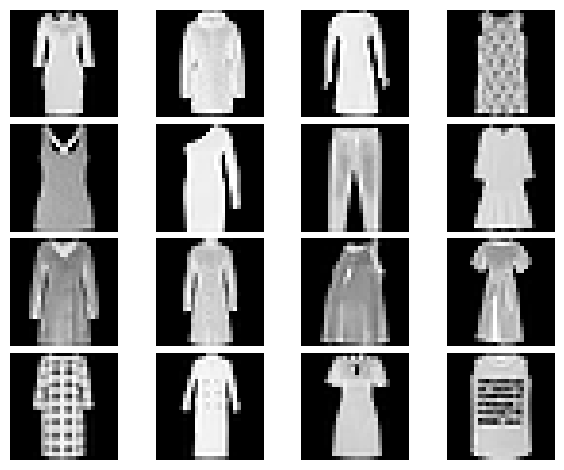

In [35]:
cluster = np.arange(0,data_n.shape[0])[pred == 2]

plt.figure(figsize=(10, 10))  
fig, ax_array = plt.subplots(4,4)
axes = ax_array.flatten()
for i , ax in enumerate(axes): 
    im = np.array(data.iloc[cluster[i],:]).reshape(28,28)
    ax.imshow(im, cmap="gray")
plt.setp(axes, xticks=[], yticks=[], frame_on=False)
plt.tight_layout(h_pad=0.5, w_pad=0.01)

Coats

+ cluster 3

<Figure size 1000x1000 with 0 Axes>

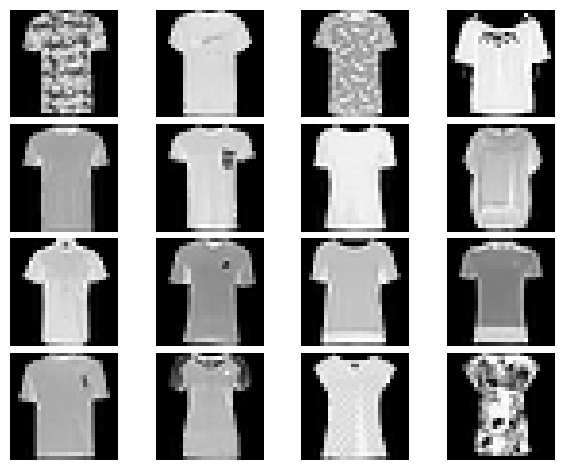

In [36]:
cluster = np.arange(0,data_n.shape[0])[pred == 3]

plt.figure(figsize=(10, 10))  
fig, ax_array = plt.subplots(4,4)
axes = ax_array.flatten()
for i , ax in enumerate(axes): 
    im = np.array(data.iloc[cluster[i],:]).reshape(28,28)
    ax.imshow(im, cmap="gray")
plt.setp(axes, xticks=[], yticks=[], frame_on=False)
plt.tight_layout(h_pad=0.5, w_pad=0.01)

coats

+ cluster 4

<Figure size 1000x1000 with 0 Axes>

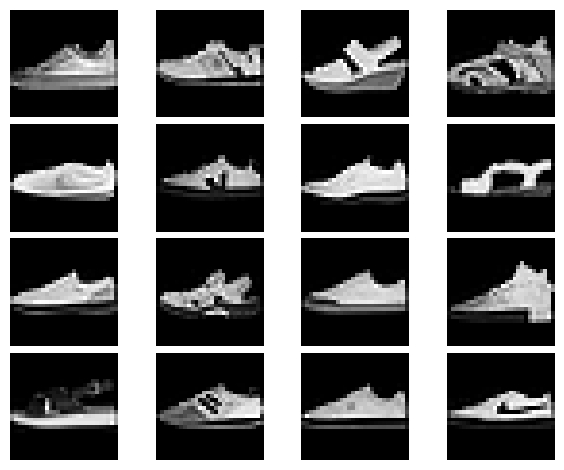

In [37]:
cluster = np.arange(0,data_n.shape[0])[pred ==4]

plt.figure(figsize=(10, 10))  
fig, ax_array = plt.subplots(4,4)
axes = ax_array.flatten()
for i , ax in enumerate(axes): 
    im = np.array(data.iloc[cluster[i],:]).reshape(28,28)
    ax.imshow(im, cmap="gray")
plt.setp(axes, xticks=[], yticks=[], frame_on=False)
plt.tight_layout(h_pad=0.5, w_pad=0.01)

This must be the sandals cluster (10 out of 16). There are soms bags and dresses in there as well.

+ cluster 5

<Figure size 1000x1000 with 0 Axes>

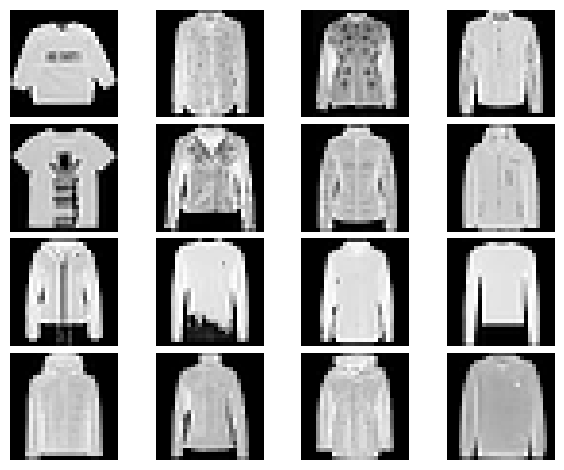

In [38]:
cluster = np.arange(0,data_n.shape[0])[pred == 5]

plt.figure(figsize=(10, 10))
fig, ax_array = plt.subplots(4,4)
axes = ax_array.flatten()
for i , ax in enumerate(axes):
    im = np.array(data.iloc[cluster[i],:]).reshape(28,28)
    ax.imshow(im, cmap="gray")
plt.setp(axes, xticks=[], yticks=[], frame_on=False)
plt.tight_layout(h_pad=0.5, w_pad=0.01)

Clearly the bags cluster.

+ cluster 6

<Figure size 1000x1000 with 0 Axes>

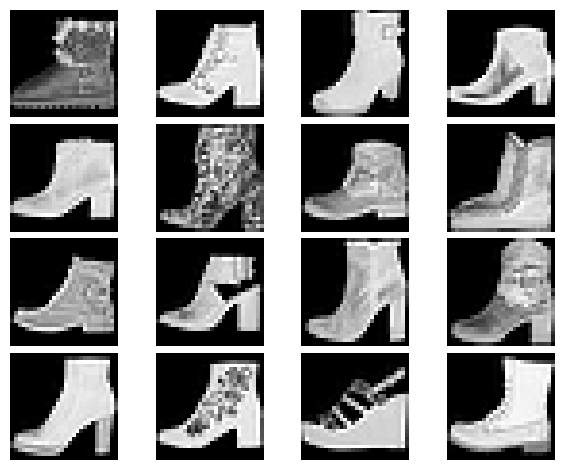

In [39]:
cluster = np.arange(0,data_n.shape[0])[pred == 6]

plt.figure(figsize=(10, 10))  
fig, ax_array = plt.subplots(4,4)
axes = ax_array.flatten()
for i , ax in enumerate(axes): 
    im = np.array(data.iloc[cluster[i],:]).reshape(28,28)
    ax.imshow(im, cmap="gray")
plt.setp(axes, xticks=[], yticks=[], frame_on=False)
plt.tight_layout(h_pad=0.5, w_pad=0.01)

Confusion here

+ cluster 7

<Figure size 1000x1000 with 0 Axes>

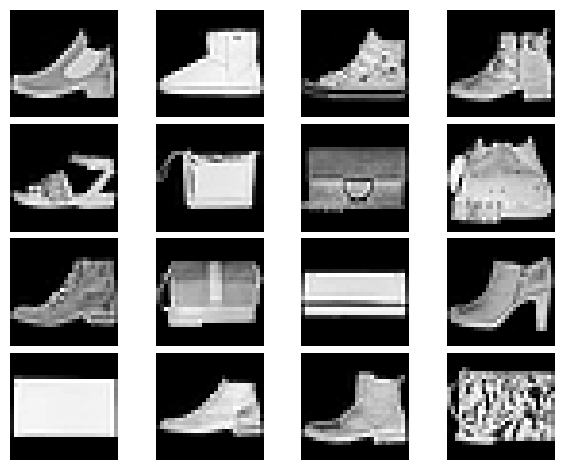

In [40]:
cluster = np.arange(0,data_n.shape[0])[pred == 7]

plt.figure(figsize=(10, 10))  
fig, ax_array = plt.subplots(4,4)
axes = ax_array.flatten()
for i , ax in enumerate(axes): 
    im = np.array(data.iloc[cluster[i],:]).reshape(28,28)
    ax.imshow(im, cmap="gray")
plt.setp(axes, xticks=[], yticks=[], frame_on=False)
plt.tight_layout(h_pad=0.5, w_pad=0.01)

Confusion

+ cluster 8

<Figure size 1000x1000 with 0 Axes>

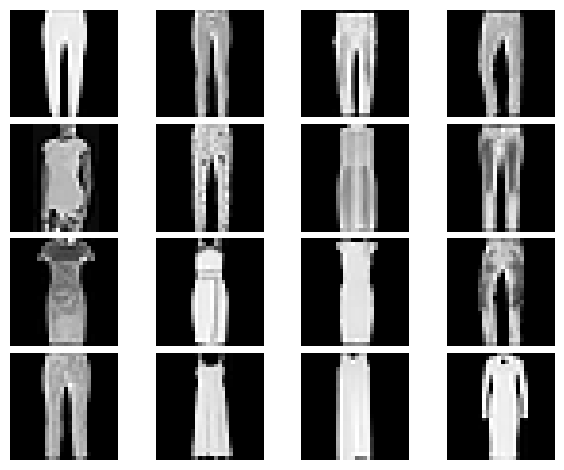

In [41]:
cluster = np.arange(0,data_n.shape[0])[pred == 8]

plt.figure(figsize=(10, 10))  
fig, ax_array = plt.subplots(4,4)
axes = ax_array.flatten()
for i , ax in enumerate(axes): 
    im = np.array(data.iloc[cluster[i],:]).reshape(28,28)
    ax.imshow(im, cmap="gray")
plt.setp(axes, xticks=[], yticks=[], frame_on=False)
plt.tight_layout(h_pad=0.5, w_pad=0.01)

Dresses

+ cluster 9

<Figure size 1000x1000 with 0 Axes>

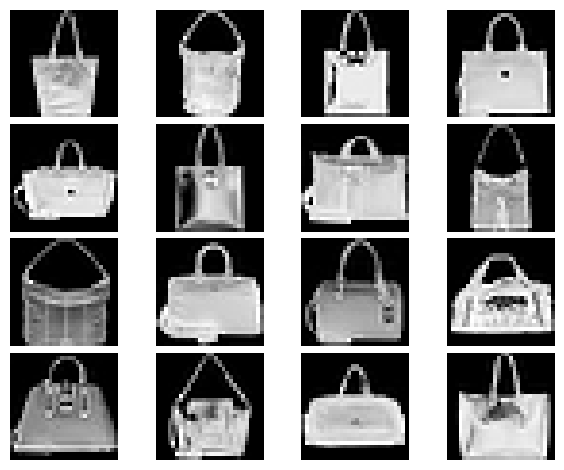

In [42]:
cluster = np.arange(0,data_n.shape[0])[pred == 9]

plt.figure(figsize=(10, 10))  
fig, ax_array = plt.subplots(4,4)
axes = ax_array.flatten()
for i , ax in enumerate(axes): 
    im = np.array(data.iloc[cluster[i],:]).reshape(28,28)
    ax.imshow(im, cmap="gray")
plt.setp(axes, xticks=[], yticks=[], frame_on=False)
plt.tight_layout(h_pad=0.5, w_pad=0.01)

Trousers with some dresses

All in all, this simple algorithm does pretty well. 

# 3. t-sne

Visualize the clusters using t-sne.
1. Perform a t-sne
    + Use random_state = 123
    + perplecity = 20
    + verbose =1
2. Plot the results of the t-sne, using predicted labels to color the plot (hue = predictions)
    + Are the clusters well-defined
3. Plot the results of the t-sne, using actual labels to color the plot (hue = labels)
    + Compare with the previous plot
    + What kind of clothes are easy to seperate? which are difficult?
    

1. Perform t-sne

In [43]:
from sklearn.manifold import TSNE

tsne = TSNE(verbose=1, perplexity=20, random_state=123 )
X_embedded = tsne.fit_transform(data_n)

[t-SNE] Computing 61 nearest neighbors...
[t-SNE] Indexed 6000 samples in 0.019s...
[t-SNE] Computed neighbors for 6000 samples in 0.361s...
[t-SNE] Computed conditional probabilities for sample 1000 / 6000
[t-SNE] Computed conditional probabilities for sample 2000 / 6000
[t-SNE] Computed conditional probabilities for sample 3000 / 6000
[t-SNE] Computed conditional probabilities for sample 4000 / 6000
[t-SNE] Computed conditional probabilities for sample 5000 / 6000
[t-SNE] Computed conditional probabilities for sample 6000 / 6000
[t-SNE] Mean sigma: 1.676858
[t-SNE] KL divergence after 250 iterations with early exaggeration: 77.709015
[t-SNE] KL divergence after 1000 iterations: 1.466791


2. Plot the results of the t-sne, using predicted labels as hue

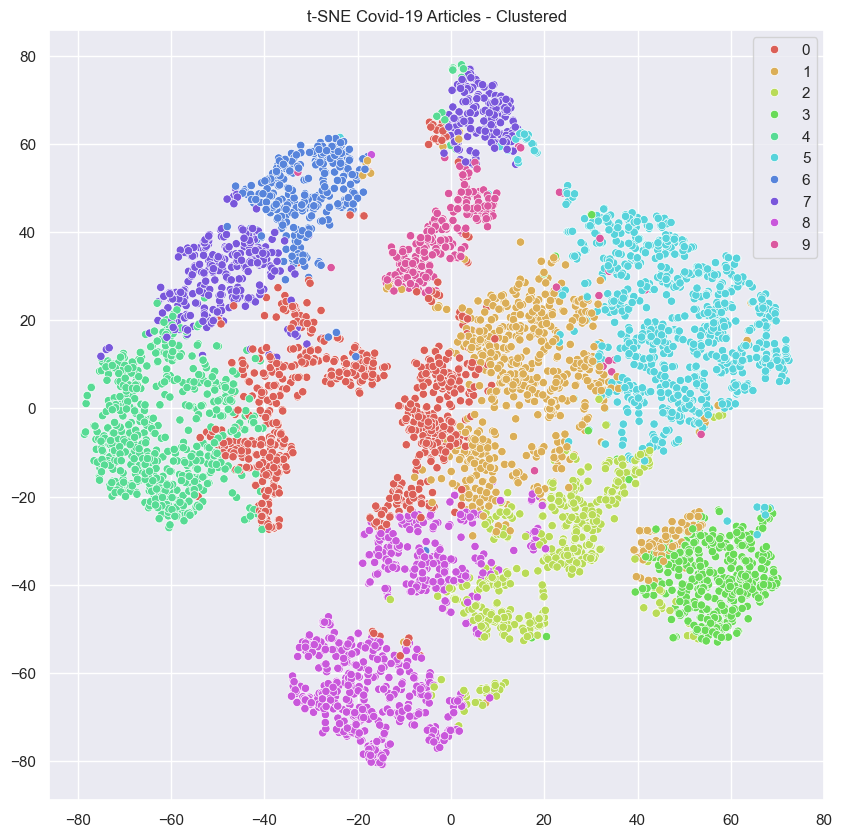

In [44]:
# sns settings
sns.set(rc={'figure.figsize':(10,10)})


# colors
palette = sns.color_palette("hls", len(set(pred)))
#
# plot
sns.scatterplot(x=X_embedded[:,0], y=X_embedded[:,1], hue=pred, legend='full', palette= palette)
plt.title("t-SNE Covid-19 Articles - Clustered")
#plt.savefig("plots/t-sne_covid19_label.png")
plt.show()

You can clearly see that most clusters are well-defined (e.g cluster 0,3,4,7 and 9), while others have a bit more difficulty (e.g 1,4 and 6 seem to consist of 2 parts). We can indeed see that cluster 3 seems to exist of 2 parts (or 2 people as we could see in the pictures).
Let's see if cluster 6 is indeed a good cluster.

3. Plot the results of the t-sne, using actual labels as hue

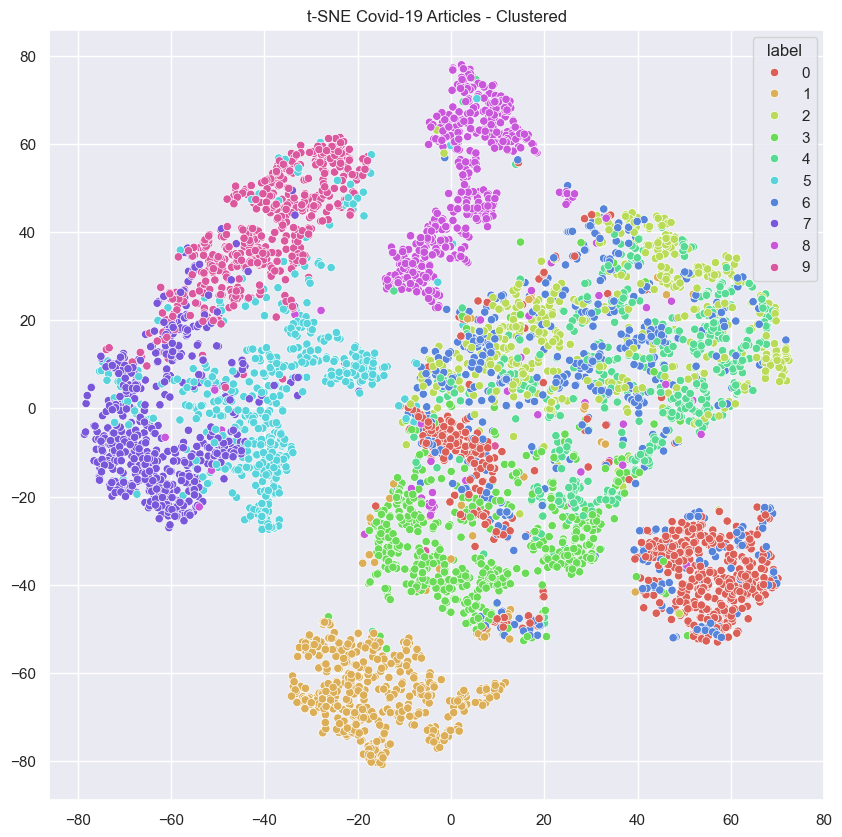

In [45]:
sns.scatterplot(x=X_embedded[:,0], y=X_embedded[:,1], hue=labels[0:6000], legend='full', palette= palette)
plt.title("t-SNE Covid-19 Articles - Clustered")
#plt.savefig("plots/t-sne_covid19_label.png")
plt.show()

As a small reminder: this is the meaning of the true labels
0. T-shirt/top
1. Trouser
2. Pullover
3. Dress
4. Coat
5. Sandal
6. Shirt
7. Sneaker
8. Bag
9. Ankle boot

We can see that the sandals, sneakers and ankle boots all lie closely together (obviously, because they are all shoes). You can see three different clusters, but they aren't completely seperated (the predictions tries to seperate them more). When comparing the true labels with the predicted labels, it can also be seen that sandals are sometimes confused with pull-over and dresses (somehow).

The bags can be predicted very well, but there are indeed two clusters within the bags visible (and it can be seen in the predicted labels that this lead to 2 different predictions).

We also see a clear seperate cluster for trousers, but in the predicted labels, we can see that they are often confused with dresses.

Then, the t-shirts seem to have a clear cluster as well, but in the predictions it is confused with other categories as wel. 

Finaly, we can see that it is very difficult to seperate pullovers, coats and shirts. The predicted labels show that the algorithm tried to find a pattern, but the t-sne suggests it's very difficult to tell these appart (as a human, I can agree with that).


# 4. PCA, then k-means

Now, lets perform a pca, then k-means and do a visualisation of the results with t-sne.


1. Perform a pca with the maximum number of components
    + the maximum number of components is the minimum of the number of features and the number of observations
2. Take a look at the scree plot
3. Zoom in on the scree plot and ad a horizontal line for y=1 (where the eigenvalue is 1)
4. Plot the cumulative percentage of explained variance for the first 20 components. Make a decision on how many components you are going to use.
5. Perform a pca with the  number of components you have chosen
6. Predict the labels for each picture
7. Perform a t-sne
    + Use random_state = 123
    + perplecity = 20
    + verbose =1
8. Plot the results of the t-sne, using predicted labels to color the plot (hue = predictions)
    + Are the clusters well-defined?
    + What has changed compared to the previous predictions?
9. Plot the results of the t-sne, using actual labels to color the plot (hue = labels)
10. Take a look at the first 16 pictures for each predicted label.   


1. Perform a pca with the maximum number of components

In [46]:
number_of_components = 784

from sklearn.decomposition import PCA
pca_model = PCA(n_components=number_of_components, svd_solver='full')
pca_model.fit(data_n)



PCA(n_components=784, svd_solver='full')

2. Scree plot

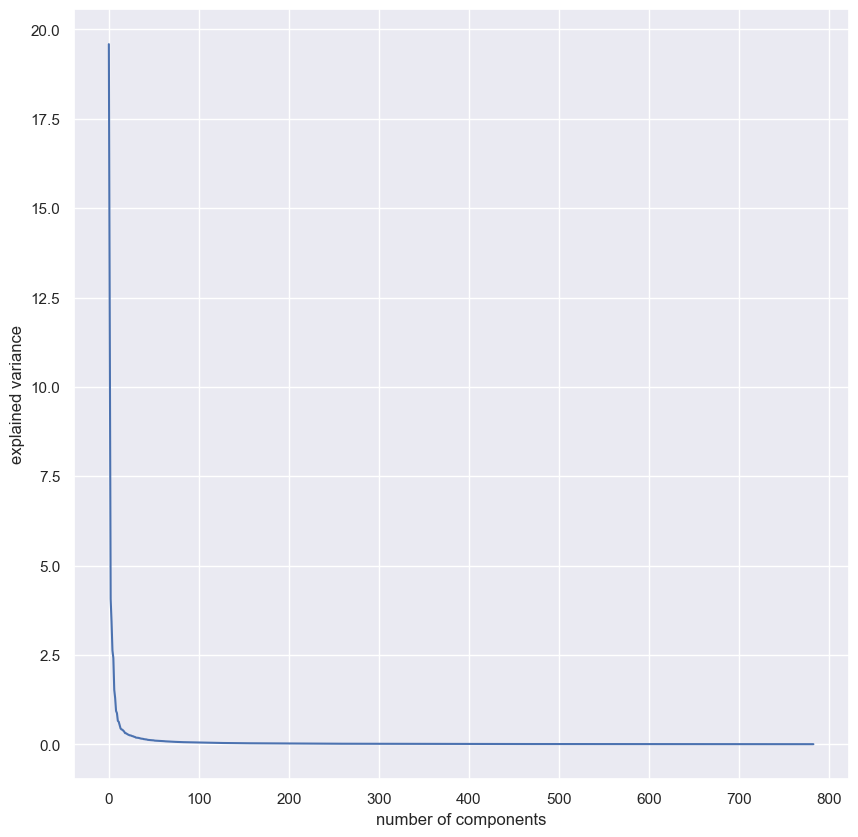

In [47]:
import matplotlib.pyplot as plt
plt.plot(pca_model.explained_variance_)
plt.xlabel('number of components')
plt.ylabel('explained variance')
plt.show()

The scree plot clearly shows a nod. Let's zoom in on the first 25 components to get a better idea.

3. Zoom in and add line

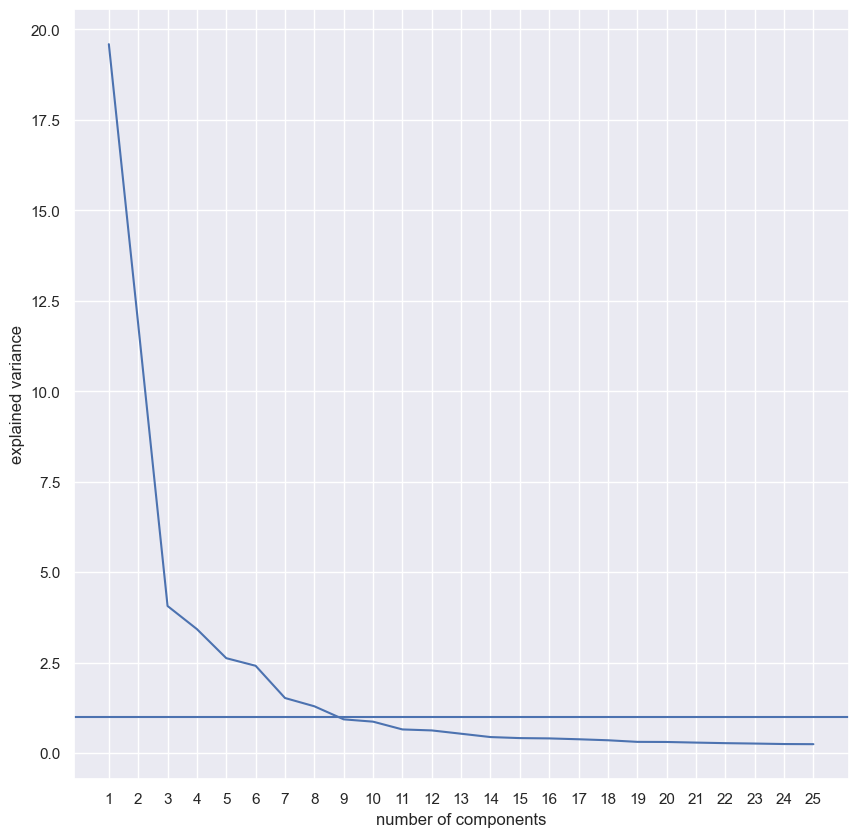

In [48]:
import numpy as np
EV = pca_model.explained_variance_[0:25]

plt.plot(EV)
plt.axhline(y=1)

plt.xlabel('number of components')
plt.ylabel('explained variance')
plt.xticks(np.arange(len(EV)), np.arange(1, len(EV)+1))  #Otherwise the x-axis starts at 1)
plt.show()

Based on this I would choose 9 components.

4. Cumulative % explained

In [49]:
np.cumsum(pca_model.explained_variance_ratio_)

array([0.29050597, 0.46623016, 0.52649017, 0.57727475, 0.61615294,
       0.65191076, 0.67446479, 0.69362664, 0.70743501, 0.72029793,
       0.72997371, 0.739245  , 0.74716019, 0.75371099, 0.75983588,
       0.76583694, 0.77148606, 0.77672502, 0.78130787, 0.78584582,
       0.79012856, 0.79418243, 0.79807253, 0.80176515, 0.80540161,
       0.80892351, 0.81226289, 0.81553289, 0.81861309, 0.82160724,
       0.82434449, 0.82703671, 0.82966654, 0.8322713 , 0.83474796,
       0.83714504, 0.83944739, 0.84171498, 0.84392298, 0.84600134,
       0.84805474, 0.85002973, 0.85198079, 0.85379516, 0.85555525,
       0.85727352, 0.85896551, 0.86063753, 0.86229368, 0.86393048,
       0.86549927, 0.86697137, 0.86842269, 0.86985622, 0.87128231,
       0.87267042, 0.87402011, 0.87533775, 0.87663237, 0.87792275,
       0.87918463, 0.88043462, 0.88162777, 0.88280439, 0.88395797,
       0.88508371, 0.88618599, 0.8872714 , 0.88834665, 0.88939494,
       0.89043279, 0.89146371, 0.8924749 , 0.89345587, 0.89441

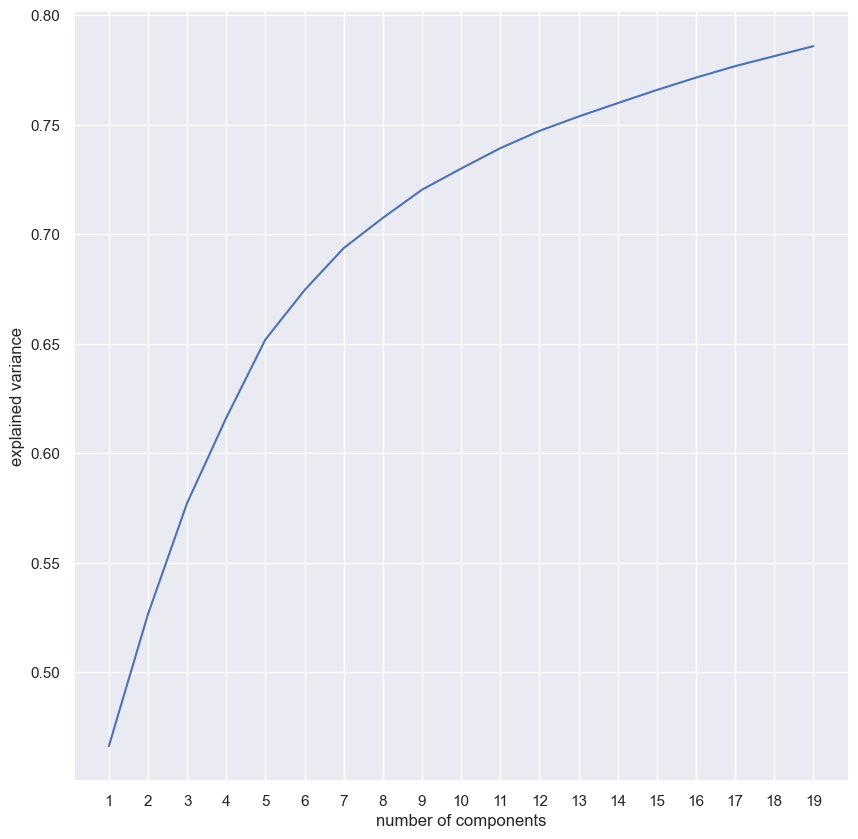

In [50]:
CS = np.cumsum(pca_model.explained_variance_ratio_)[1:20]
plt.plot(CS)
plt.xlabel('number of components')
plt.ylabel('explained variance')
plt.xticks(np.arange(len(CS)), np.arange(1, len(CS)+1))

plt.show()

The cumulative explained variance is above 70% at component 9 ( not 80% yet, but I can live with it)

5. PCA

In [51]:
pca_model = PCA(n_components=9, svd_solver='full')
pca_model.fit(data_n)
pca_data= pca_model.transform(data_n)

6. Predict

In [52]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=10, random_state=123)
kmeans.fit(pca_data)
pred_pca = kmeans.predict(pca_data)
pred_pca

array([5, 2, 5, ..., 9, 6, 3], dtype=int32)

7. t-sne

In [53]:
from sklearn.manifold import TSNE
import seaborn as sns

tsne = TSNE(verbose=1, perplexity=20, random_state=124 )
X_embedded_pca = tsne.fit_transform(pca_data)


[t-SNE] Computing 61 nearest neighbors...
[t-SNE] Indexed 6000 samples in 0.006s...
[t-SNE] Computed neighbors for 6000 samples in 0.147s...
[t-SNE] Computed conditional probabilities for sample 1000 / 6000
[t-SNE] Computed conditional probabilities for sample 2000 / 6000
[t-SNE] Computed conditional probabilities for sample 3000 / 6000
[t-SNE] Computed conditional probabilities for sample 4000 / 6000
[t-SNE] Computed conditional probabilities for sample 5000 / 6000
[t-SNE] Computed conditional probabilities for sample 6000 / 6000
[t-SNE] Mean sigma: 0.763520
[t-SNE] KL divergence after 250 iterations with early exaggeration: 74.297485
[t-SNE] KL divergence after 1000 iterations: 1.193265


8. Plot the results of the t-sne, using predicted labels as hue

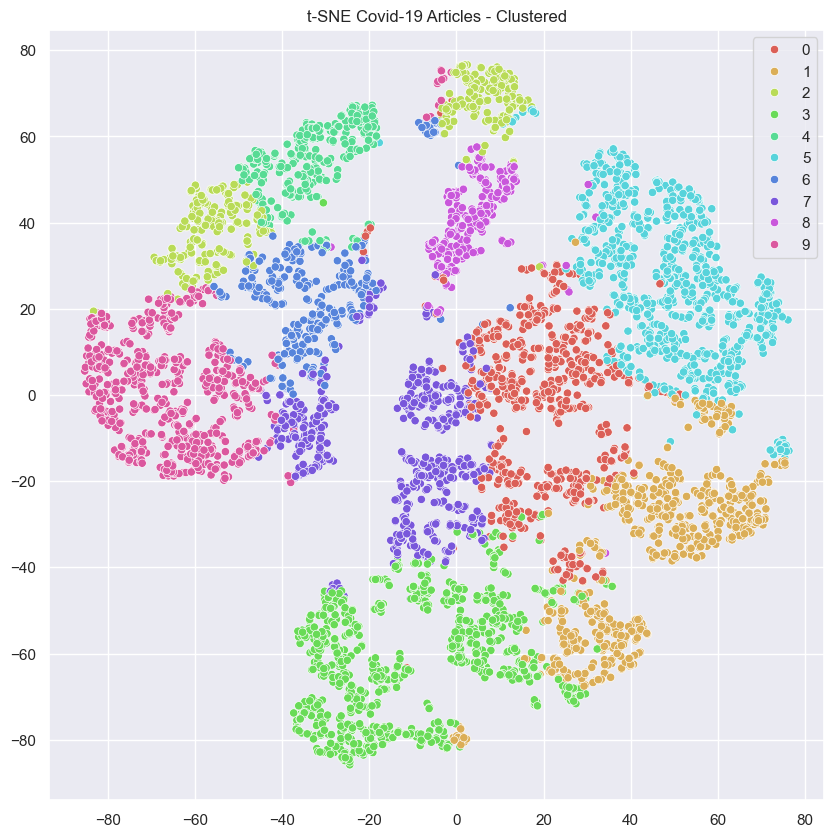

In [54]:

sns.set(rc={'figure.figsize':(10,10)})
# colors
palette = sns.color_palette("hls", len(set(pred_pca)))
#
# plot
sns.scatterplot(x=X_embedded_pca[:,0],y= X_embedded_pca[:,1], hue=pred_pca, legend='full', palette= palette)
plt.title("t-SNE Covid-19 Articles - Clustered")
#plt.savefig("plots/t-sne_covid19_label.png")
plt.show()

9. Plot the results of the t-sne, using predicted labels as hue

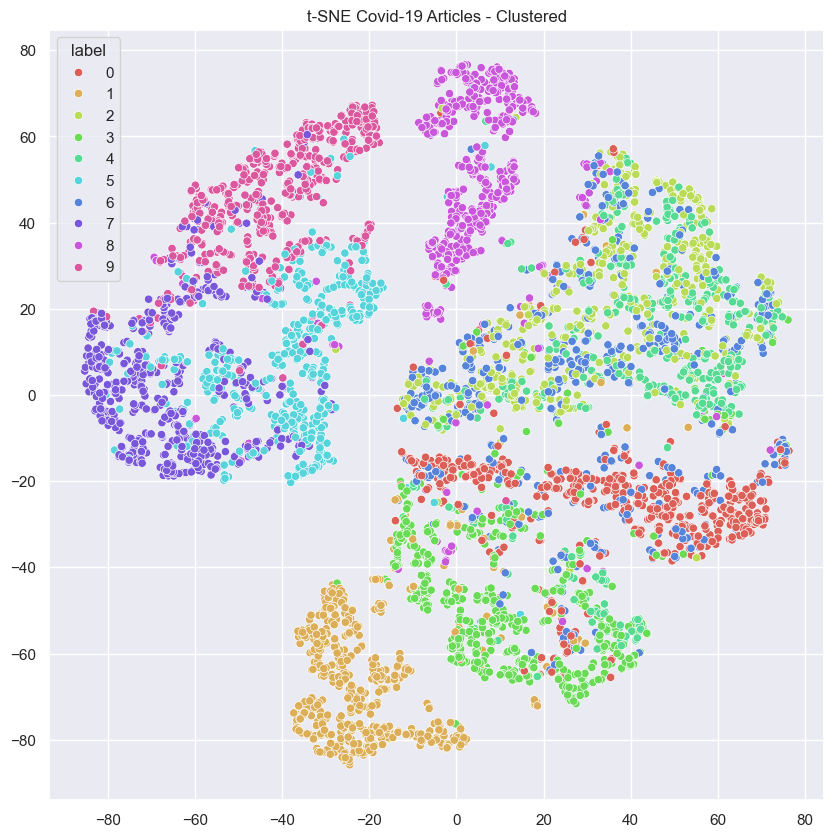

In [55]:
sns.scatterplot(x=X_embedded_pca[:,0], y=X_embedded_pca[:,1], hue=labels[0:6000], legend='full', palette= palette)
plt.title("t-SNE Covid-19 Articles - Clustered")
#plt.savefig("plots/t-sne_covid19_label.png")
plt.show()

We still see the confusion between pullovers, shirts and coats. There are also still two predicted clusters for bags. 

But know we also see that the ankle boots have two seperate predicted classes. This means the cluster for the t-shirt has disappeared (and added to the confusion between pullovers, shirts and coats. 

10. Take a look at the first 16 pictures for each predicted label.

<Figure size 1000x1000 with 0 Axes>

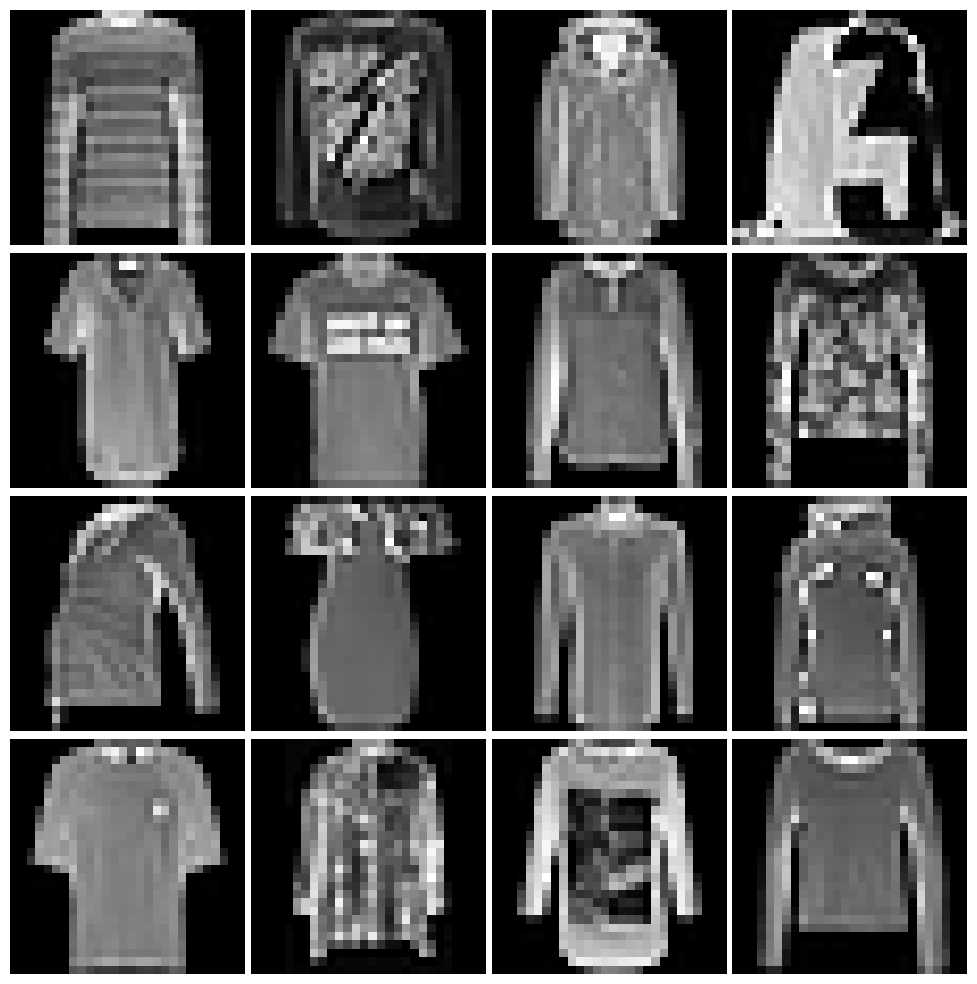

In [56]:
cluster = np.arange(0,pca_data.shape[0])[pred_pca == 0]

plt.figure(figsize=(10, 10))  
fig, ax_array = plt.subplots(4,4)
axes = ax_array.flatten()
for i , ax in enumerate(axes): 
    im = np.array(data.iloc[cluster[i],:]).reshape(28,28)
    ax.imshow(im, cmap="gray")
plt.setp(axes, xticks=[], yticks=[], frame_on=False)
plt.tight_layout(h_pad=0.5, w_pad=0.01)